# Optimisation with Genetic Algorithm

Task: Use a genetic algorithm to estimate the intersection point of two straight lines: 
* $y_{1}=-x$
* $y_{2}=x+1$

### 1) Import the required Python libraries

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()

### 2) For context, plot the two straight lines together to show the intersection point

* From the below plot the expected intersection point is at $x = -\dfrac{1}{2}$
* The genetic algorithm should yield a similar value.

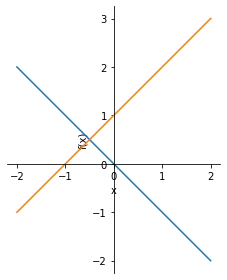

In [2]:
x = sp.Symbol('x')

y1 = -x
y2 = x+1

plot = sp.plotting.plot(y1, (x,-2,2), aspect_ratio=[1,1], show=False) # Blue line
plot.extend(sp.plotting.plot(y2, (x,-2,2), aspect_ratio=[1,1], show=False)) # Orange line
plot.show()

### 3) Define the objective (or cost) function as the squared difference between $y_{1}$ and $y_{2}$
* Best fitness occurs at the intersection point, where $y_{1}-y_{2} = 0$
* Square the return value to ensure the algorithm optimises for the minimum squared error $min([y_{1}-y_{2}]^{2}) = 0$
* If we do not square the return value, the algorithm will incorrectly select for $x$ values that yield the most extreme negative difference $min(y_{1}-y_{2}) = -\infty$

In [3]:
def objective(x):
    return ((-x) - (x+1))**2

### 4) Initialise parameters for the genetic algorithm

In [4]:
population = None # Initialise a population of "guinea pigs". Each "guinea pigs" is represented by a number.
best_current = None # Best estimate for the intersection point
best_history = [] # Record historical estimates for the intersection point, to plot learning curve
epochs = 100 # How many generations of "guinea pigs"?
pop_size = 1000 # How many "guinea pigs" in the pig pen?
mutation_rate = 0.1 # The propotion of "guinea pigs" to develop mutations

### 5) Implement the genetic algorithm in a for-loop
* Initialisation: Generate a population of "guinea pigs". Each "guinea pigs" is represented by a number.
* Evaluation: Each "guinea pig" is evaluated for fitness against the objective function.
* Mutation: Randomly mutate a certain proportion of the "guinea pig" population. Some pigs become fitter (or unfit).
* Elitism: Ensure that the fittest "guinea pig" is remains in the population.


In [5]:


for i in range(epochs): # Epochs
    # Initialisation
    if population is None:
        population = []
        for i in range(pop_size): # Population size
            population.append(np.random.choice([-1,1])*np.random.random()*np.random.randint(-1000, 1000))

    # Evaluation
    fitness = [objective(x) for x in population]
    best_current = population[np.argmin(fitness)]
    best_history.append(best_current)

    # Mutation
    for k in range(len(population)):
        if np.random.uniform() <= mutation_rate:
            population[k] = np.random.choice([-1,1])*np.random.random()*np.random.randint(-1000, 1000)

    # Elitism
    chosen_one = np.random.randint(0, len(population))
    population[chosen_one] = best_current

### 6) What is the genetic algorithm's best estimate of the intersection point between $y_{1}$ and $y_{2}$?

In [6]:
# Best estimate for point of intersection of y1=-x and y2=x+1

best_history[-1] # Veeeeery close of x = -1/2 or -0.5

### 7) Plot the fittest "guinea pig" of each generation
Mutation introduces fitter "guinea pigs" into the population, causing the cost function of the fittest "guinea pig" to drop to nearly zero after several generations.

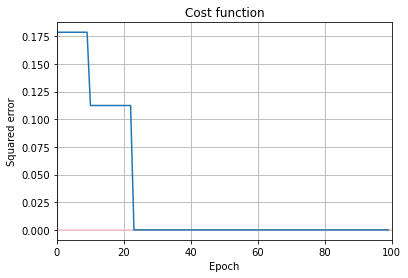

In [7]:
# Minimum cost function at minimum squared error

plt.axhline(0, color='pink')
plt.plot(range(epochs), [objective(x) for x in best_history])
plt.xlim((0,100))
plt.xlabel('Epoch')
plt.ylabel('Squared error')
plt.grid()
plt.title('Cost function')
plt.show()

### 8) For comparison, analytically solve $y_{1} = y_{2}$ for $x$

* The true value for the intersection point is $x =  -\dfrac{1}{2}$ or $-0.5$
* This is very close the genetic algorithm's best estimate.

In [8]:
# Analytical solution

sp.solve(y1-y2)

In [9]:
# Difference between best estimate and true value

error = best_history[-1] - sp.solve(y1-y2)[0]
error

In [10]:
# Error size as proportion of true value

np.abs(error/sp.solve(y1-y2)[0])

### Author
H.N. 13/10/23